# The purpose of this Notebook will be to demonstrate 3 methods for predicting NYC rent prices using regression: linear regression, random forest regression, and gradient boosted regression

# Linear Regression

Before diving into the predictive model, let's look at the correlation plot for all of our potential explanatory variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set_style('darkgrid')


Populating the interactive namespace from numpy and matplotlib


In [8]:
df=pd.read_pickle('rent_final.pickle')

In [5]:
df.head()

bath  bed  price    size                    street    neighborhood  \
4    1.0  1.0   2750   750.0     564 Morgan Avenue #1R      Greenpoint   
6    1.0  2.0   2599   850.0     41-49 45th Street #2A       Sunnyside   
8    1.0  1.0   3610   683.0      175 Kent Avenue #515    Williamsburg   
9    1.0  1.0   3750   666.0  305 West 50th Street #8E    Midtown West   
10   1.0  3.0   3000  1000.0  254 Manhattan Avenue #3A  Central Harlem   

                         coordinates   latitude  longitude  \
4   [40.7238473, -73.93926569999999]  40.723847 -73.939266   
6          [40.7452048, -73.9190244]  40.745205 -73.919024   
8   [40.71793820000001, -73.9637027]  40.717938 -73.963703   
9   [40.7626779, -73.98651939999999]  40.762678 -73.986519   
10         [40.8015168, -73.9590577]  40.801517 -73.959058   

                        closest station  station distance (miles)  \
4                    Canarsie-Graham Av                  0.722732   
6             Flushing-Bliss St-46th St                  0.149124   
8                   Canarsie-Bedford Av                  0.474717   
9                      8 Avenue-50th St                  0.040106   
10  8 Avenue-Cathedral Parkway-110th St                  0.088642   

   closest train  
4              L  
6              7  
8              L  
9              C  
10             B

In [14]:
df=df[['bath','bed', 'price', 'size','closest station','station distance (miles)','closest train']]
#don't need the other (coordinates) columns

In [15]:
df.corr()

bath       bed     price      size  \
bath                      1.000000  0.567214  0.686295  0.711612   
bed                       0.567214  1.000000  0.371342  0.681179   
price                     0.686295  0.371342  1.000000  0.687988   
size                      0.711612  0.681179  0.687988  1.000000   
station distance (miles)  0.040046  0.056386 -0.063549  0.058233   

                          station distance (miles)  
bath                                      0.040046  
bed                                       0.056386  
price                                    -0.063549  
size                                      0.058233  
station distance (miles)                  1.000000

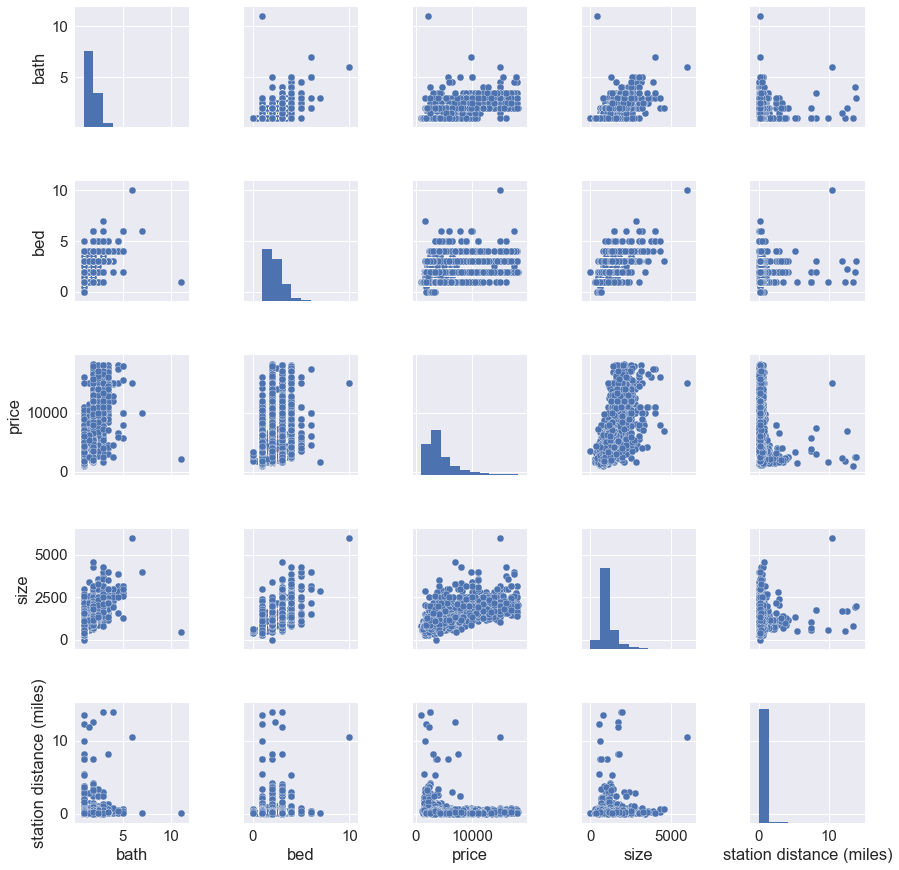

In [24]:
sns.set(font_scale=1.5)
sns.pairplot(df)


From a preliminary examination, it seems that the number of bathrooms and the size of the apartment seem to be most correlated with the monthly rental price. 

Now onto the Linear Regression model implemented in sklearn

In [3]:
from sklearn import linear_model, model_selection, pipeline

In [28]:
df.columns

Index(['bath', 'bed', 'price', 'size', 'closest station',
       'station distance (miles)', 'closest train'],
      dtype='object')

Let's start with a simple model first

In [57]:
x=df['size']
y=df['price']

In [58]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y,random_state=5)

In [64]:
lr=linear_model.LinearRegression()

In [66]:
lr.fit(x_train.reshape(-1,1), y_train)

/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lr.score(x_train.reshape(-1,1), y_train)

/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.451796938155838

In [70]:
lr.score(x_test.reshape(-1,1),y_test)

/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.5274387261184494

Looks like the simpler model didn't perform as well

In [84]:
predict=lr.predict(x_test.reshape(-1,1))

/Users/anthonykhoudary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


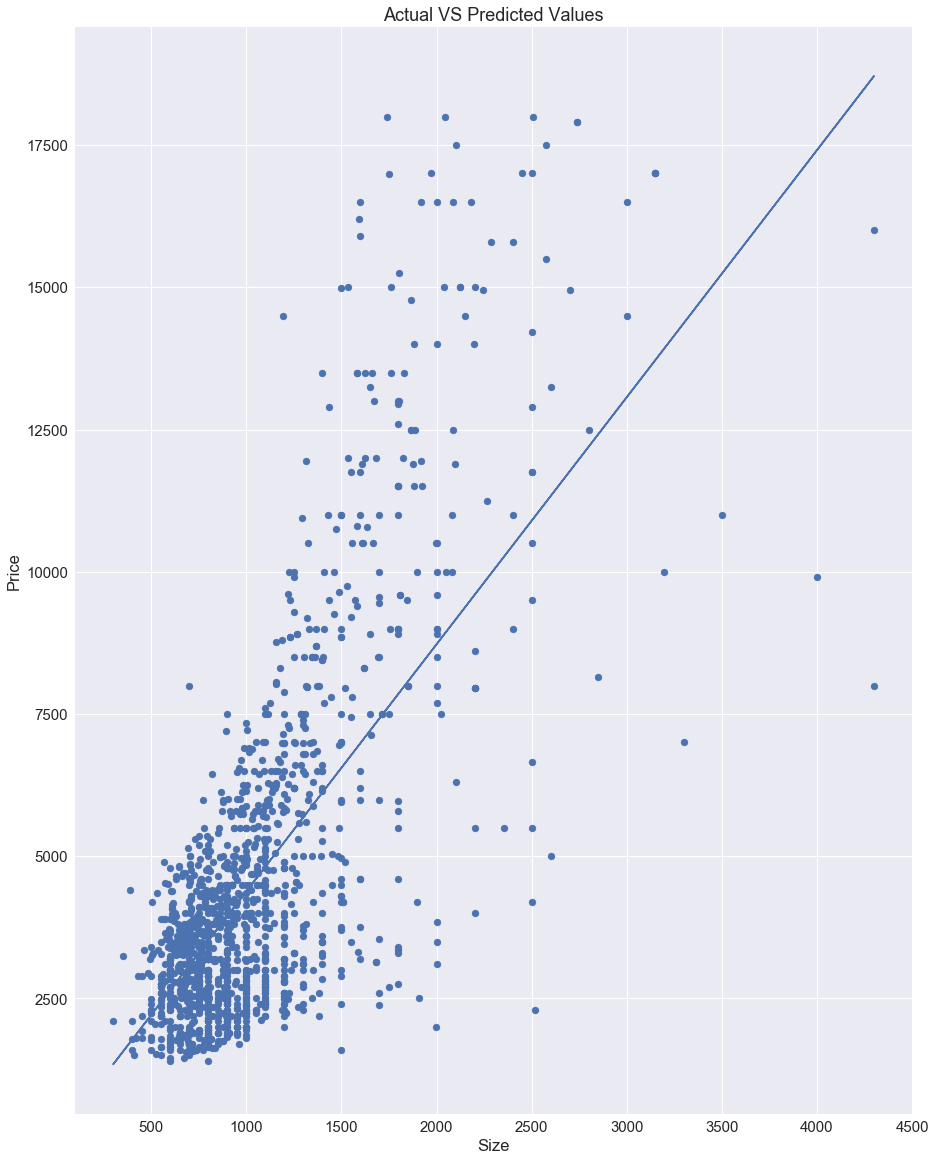

In [92]:
plt.figure(figsize=(15,20))
plt.title('Actual VS Predicted Values')
plt.xlabel('Size')
plt.ylabel('Price')
plt.scatter(x_test,y_test)
plt.plot(x_test,predict)
#plt.savefig('lr1_actualvspredict.pdf')


ValueError: x and y must be the same size

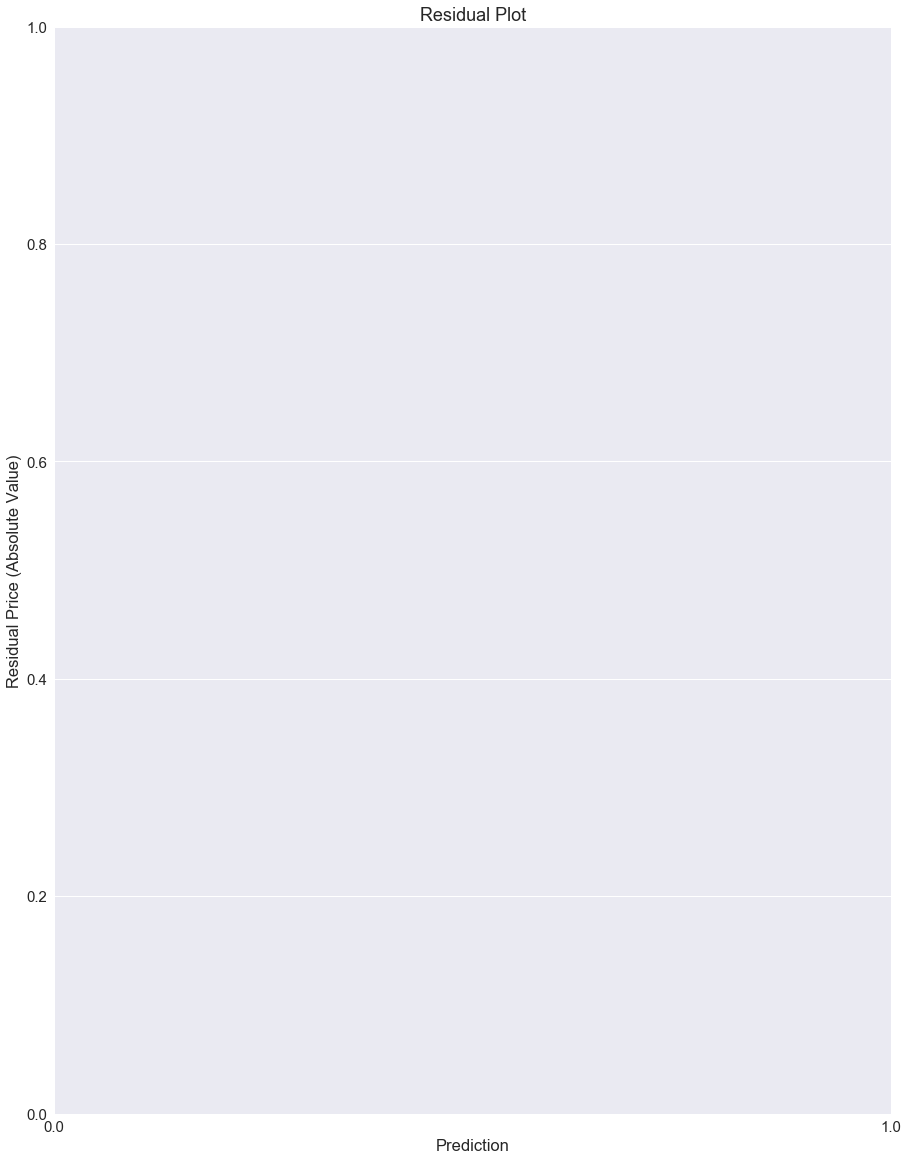

In [119]:
plt.figure(figsize=(15,20))
plt.title("Residual Plot")
plt.ylabel('Residual Price (Absolute Value)')
plt.xlabel('Prediction')
plt.scatter(x_test, predict-y_test)
plt.savefig('lr1_residuals.pdf')

In [97]:
lr.coef_

array([4.34305329])

So, in this model, price is about 4.34 times the sqaure footage of the apartment

From assessing the above residuals graph, the pattern is clearly not random. This indicates that our model can be improved. Two ways to improve the model would be to add more explanatory variables. Or, we could transform the response variable to follow a more normal distribution. First, let's try adding more variables. 

In [142]:
x=df[['size','bath','bed']]
y=df['price']

In [143]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y,random_state=5)

In [144]:
lr2=linear_model.LinearRegression()

In [145]:
lr2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
lr2.score(x_train, y_train)

0.5720676439256864

The model has a training R<sup>2</sup> of 57.2% (10% higher than the simpler model)

In [147]:
lr2.score(x_test,y_test)

0.6146192588789888

The model has a test R<sup>2</sup> of 61.5% (10% higher than the simpler model)

Great, now let's examine the coefficients and residual plots

In [148]:
x.columns

Index(['size', 'bath', 'bed'], dtype='object')

In [149]:
coefficients=dict(zip(x.columns, lr2.coef_))

In [150]:
coefficients

{'bath': 2069.256863513477,
 'bed': -862.6385531104839,
 'size': 3.4161603600518244}

Wow!!! $2000 per bathroom!!

In [151]:
predictions=lr2.predict(x_test)

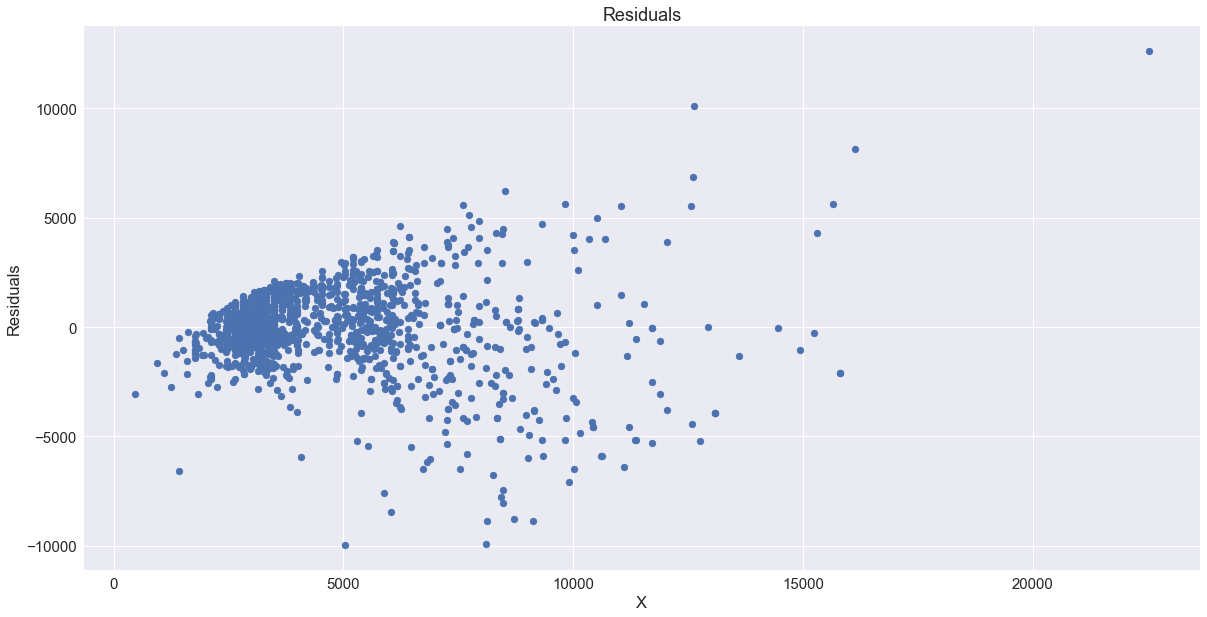

In [152]:
plt.figure(figsize=(20,10))
plt.title('Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.scatter(predictions, predictions-y_test)
plt.savefig('lr2_residuals.pdf')

Looks like we did better than last time. However, I think we can still improve this Linear Regression model. Let's log transformt the response variable (price)

In [126]:
x=df[['size','bath','bed']]
y=np.log(df['price'])

In [128]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y, random_state=5)

In [129]:
lr3=linear_model.LinearRegression()

In [130]:
lr3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
lr3.score(x_train, y_train)

0.5095226551108858

In [132]:
lr3.score(x_test,y_test)

0.5536947262246186

Hmmm, the model actually performed worse. Let's look at the coefficients and residuals

In [133]:
coefficients_log=dict(zip(x.columns, lr3.coef_))

In [137]:
coefficients_log

{'bath': 0.4019198784692811,
 'bed': -0.13897214287001108,
 'size': 0.0005074108241417429}

In [138]:
predictions_log=lr3.predict(x_test)

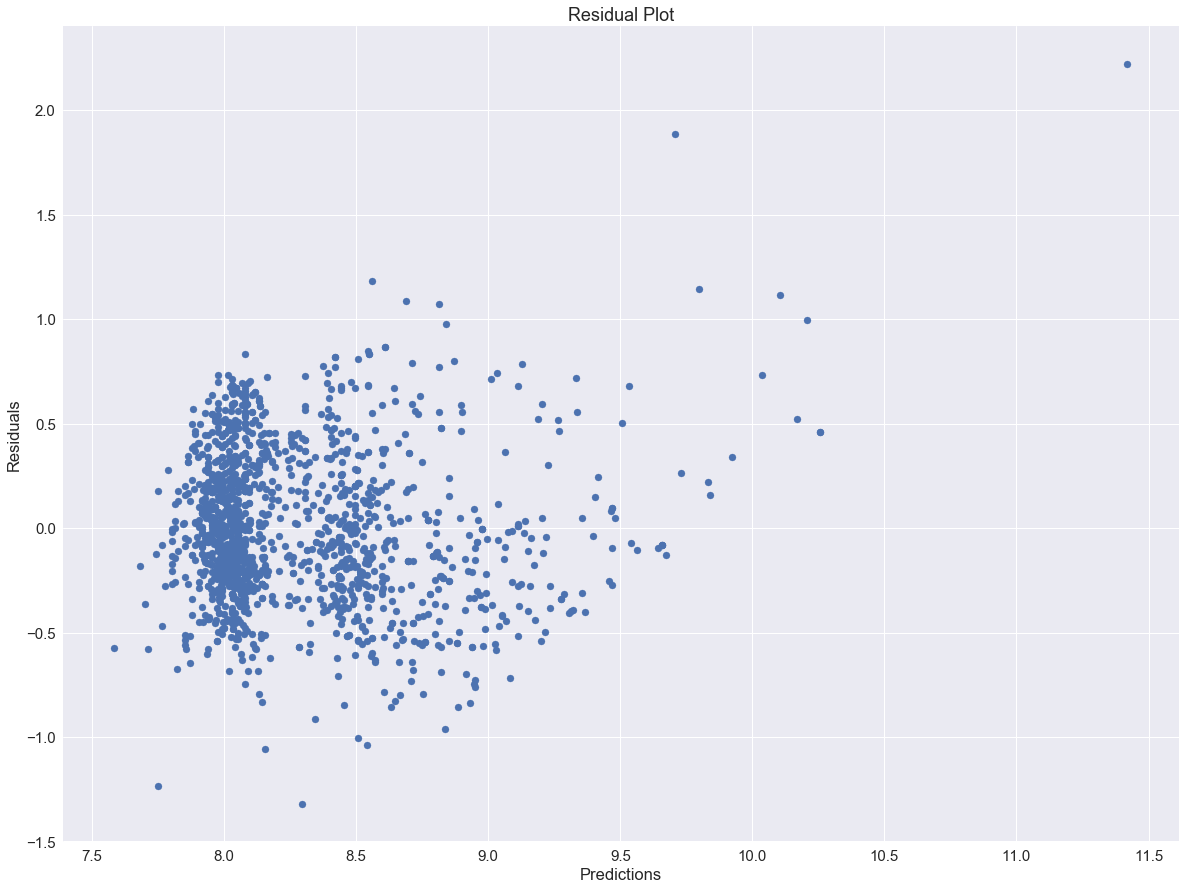

In [141]:
plt.figure(figsize=(20,15))
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predictions')
plt.scatter(predictions_log, predictions_log-y_test)
plt.savefig('lr_log_residuals.pdf')

Instead of conitnuing further with this Linear Regression. Let's See if we can do better with a Random Forest Regressor

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

As a first pass, we'll use the entire feature space to predict price

In [15]:
x=df.drop('price', axis=1)
y=df['price']

In [16]:
x=pd.get_dummies(x) #need to get dummy variables for all of the categorical features

In [161]:
x.head()

bath  bed    size  station distance (miles)  \
4    1.0  1.0   750.0                  0.722732   
6    1.0  2.0   850.0                  0.149124   
8    1.0  1.0   683.0                  0.474717   
9    1.0  1.0   666.0                  0.040106   
10   1.0  3.0  1000.0                  0.088642   

    closest station_4 Avenue-25th St  closest station_4 Avenue-36th St  \
4                                  0                                 0   
6                                  0                                 0   
8                                  0                                 0   
9                                  0                                 0   
10                                 0                                 0   

    closest station_4 Avenue-45th St  closest station_4 Avenue-53rd St  \
4                                  0                                 0   
6                                  0                                 0   
8                                  0                                 0   
9                                  0                                 0   
10                                 0                                 0   

    closest station_4 Avenue-59th St  closest station_4 Avenue-77th St  \
4                                  0                                 0   
6                                  0                                 0   
8                                  0                                 0   
9                                  0                                 0   
10                                 0                                 0   

         ...         closest train_F  closest train_FS  closest train_G  \
4        ...                       0                 0                0   
6        ...                       0                 0                0   
8        ...                       0                 0                0   
9        ...                       0                 0                0   
10       ...                       0                 0                0   

    closest train_GS  closest train_J  closest train_L  closest train_M  \
4                  0                0                1                0   
6                  0                0                0                0   
8                  0                0                1                0   
9                  0                0                0                0   
10                 0                0                0                0   

    closest train_N  closest train_Q  closest train_R  
4                 0                0                0  
6                 0                0                0  
8                 0                0                0  
9                 0                0                0  
10                0                0                0  

[5 rows x 365 columns]

In [17]:
df.drop('price',axis=1).shape

(6044, 7)

In [18]:
x.shape #went from 6 to 365 features!!!

(6044, 5184)

In [19]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y, random_state=5)

In [166]:
rf=RandomForestRegressor(n_estimators=100)

In [167]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [168]:
rf.score(x_train, y_train)

0.9741070543898193

High training accuracy is very common for Random Forest (or any tree based algorithm)

In [169]:
rf.score(x_test,y_test)

0.8128747170238607

81.3% accuracy is much higher than we were able to achieve for Linear Regression

One way to imporove the accuracy of the model would be to tune the various hyperparameters of the Random Forest Regression algorithm. One of the best way to search the hyperparameter space is to use a randomized grid search. This randomly searches through a range of parameter values allowing us to choose the parameters with the highest cross-validated score.

In [193]:
trees=np.arange(25,225,25)
features=['auto','sqrt']
depth=np.arange(5,55,5)
#different ranges for varying features



In [194]:
param_grid=dict(n_estimators=trees, max_features=features, max_depth=depth)

In [195]:
param_grid

{'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 'max_features': ['auto', 'sqrt'],
 'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200])}

In [4]:
from sklearn.model_selection import RandomizedSearchCV

In [197]:
rand=RandomizedSearchCV(rf, param_grid, cv=10,scoring='neg_mean_absolute_error', n_iter=20)

In [198]:
rand.fit(x,y) #don't need to do train test split as the cv method is kfold in the RandomizedSearchCV

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [201]:
rand.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}

In [202]:
rand.best_score_

-680.9402607843499

In [22]:
rf2=RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [23]:
rf2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
rf2.score(x_train, y_train)

0.9767876181818781

In [25]:
rf2.score(x_test,y_test)

0.8276259411146363

Using the Randomized Grid Search we were able to increase the test score by around 1.5% to 82.7%

In [26]:
rf2.feature_importances_

array([0.18622541, 0.05156303, 0.18565036, ..., 0.00200987, 0.00065897,
       0.00291351])

# Gradient Boosted Regression

In [27]:
df.drop(['coordinates','latitude','longitude','neighborhood'],axis=1, inplace=True)

ValueError: labels ['coordinates' 'latitude' 'longitude' 'neighborhood'] not contained in axis

In [28]:
x=df.drop('price',axis=1)
y=df['price']

In [29]:
x=pd.get_dummies(x)

In [33]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(x,y,random_state=5)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gb=GradientBoostingRegressor(n_estimators=3000) #first pass with many estimators

In [36]:
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [37]:
gb.score(x_train, y_train)

0.9776221178956824

In [38]:
gb.score(x_test,y_test)

0.8517406235647335

The gradient boosted algorithm was able to achieve a testing R<sup>2</sup> of 85.2%.This is better than the Random Forest Regressor. Now let's try tuning the algorithm's hyperparameters 

In [40]:
gb_grid={
    'max_depth':[3,5],
    'max_features':['sqrt',None],
    'subsample':[0.25,0.5,0.75,1]
    }

In [41]:
from sklearn.model_selection import GridSearchCV

In [46]:
gb=GradientBoostingRegressor(n_estimators=3000)

In [47]:
grid=GridSearchCV(gb, gb_grid,cv=10, scoring='r2') #set scoring to be r2 and 10 stratified kfolds

In [48]:
grid.fit(x,y)

KeyboardInterrupt: 